## 14 Detection

For describing detection, we assume a linear signal model, in which the objects are additively superposed on a background signal $h(x)$. In the image, objects are represented by signals $o_i(x)$, whose amplitudes are weighted with factors $c_i \in \mathcal{R}, c_i > 0$. In the image $g(x)$, these object signals can be shifted, scaled or rotated:

\begin{align}
g(x) = \sum_i c_i o_i(s_i A_i x - x_i) + h(x).
\end{align}

The vectors $x_i \in \mathcal{R}^2$ describe the position of the objects in the image(translation), the $s_i \in \mathcal{R}, s_i > 0$ scale their spatial extent, and $A_i$ rotate the object by the angle $\phi_i$

### 14.1 Detection of known objects by linear filters

1. Assumption No. 1: no rotation. The simplified model then is
\begin{align}
g(x) = co(x-x_0) + h(x)
\end{align}

2. Assumption No. 2: deterministic signal $o(x)$.

#### 14.1.1 Unknown background

For a single object $o(x)$ at the position $x_0$, the optimal filter is the correlation filter **(matched filter)**.
The impulse response of the **matched filter** $v(x)$ is given by
\begin{align}
v(x) = o(-x) \Leftrightarrow V(f)=O^*(f)
\end{align}

A more general filter is the **fractional power filter (FPF)**
\begin{align}
V_q(f) = |O(f)|^q e^{-\mathrm{j} \mathrm{arg}(O(f))},~~ q \in [-1;1].
\end{align}


**Special cases**
1. $q = -1$ inverse filter. Problem with Noise ==> see Wiener filter.
2. $q = 0$ Phase-only filter (POF). Interesting for optical realization because no change in intensity.

3. $q = 1$ Correlation filter or Matched Filter. Optimal filter for white noise. Optimal filter that minimizes the so-called "peak location error".

correlation coefficient = 0.932057
x=75 y=170


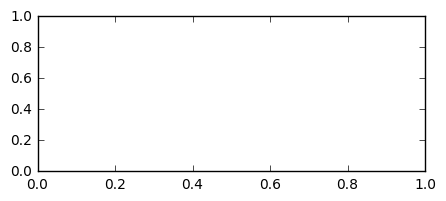

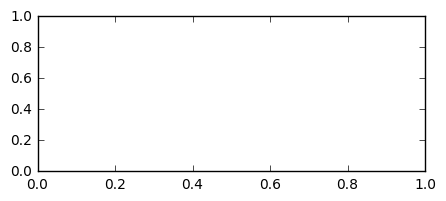

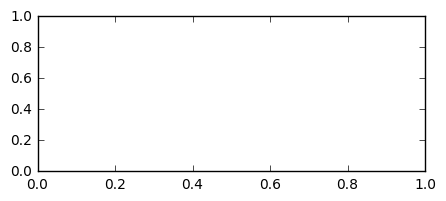

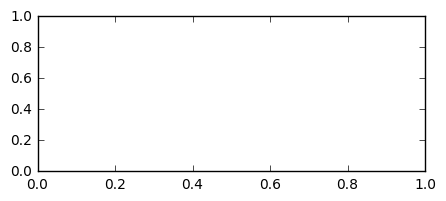

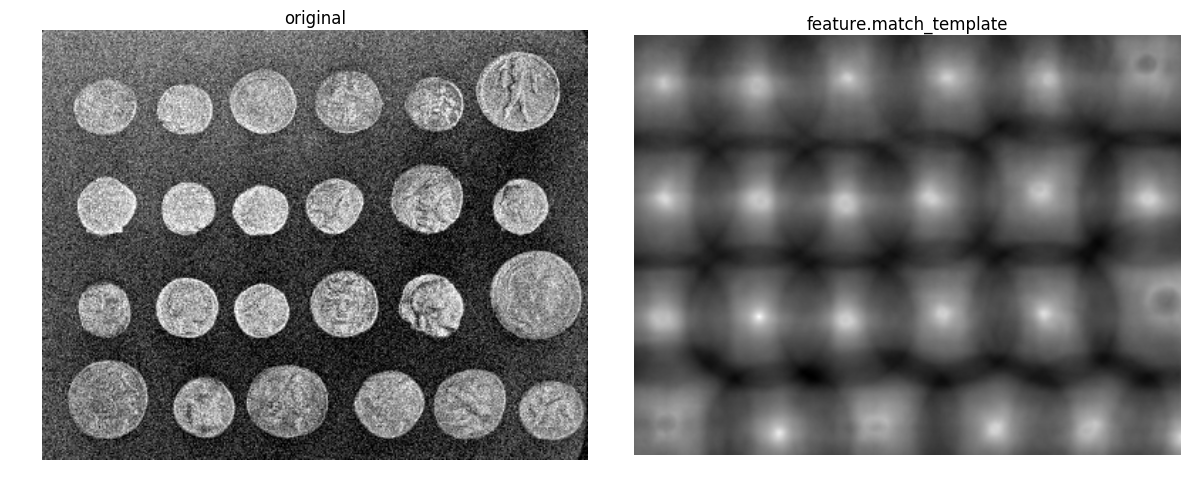

In [19]:
from skimage import transform, feature, filters, util, exposure, data, io, color, draw
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

image = data.coins()
coin = image[170:220, 75:130]
image = util.random_noise(image, var=0.01, mean=0)


result = feature.match_template(image, coin)


fig,axes = plt.subplots(1,2, figsize=(12,6))

titles = ["original", "feature.match_template"]
for ax, im, tit in zip(axes, [image,result], titles):
    ax.imshow(im, cmap=cm.gray)
    ax.set_axis_off()
    ax.set_title(tit)


ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print("correlation coefficient = " + str(np.max(result)))
print("x=" + str(x), "y=" + str(y))

fig.tight_layout()
plt.show()

Just for comparison: Doing the matched Filter by hand using scipy.signal.correlate2d and scipy.signal.fftconvolve

correlation coefficient = 0.572173237065
x=75 y=170


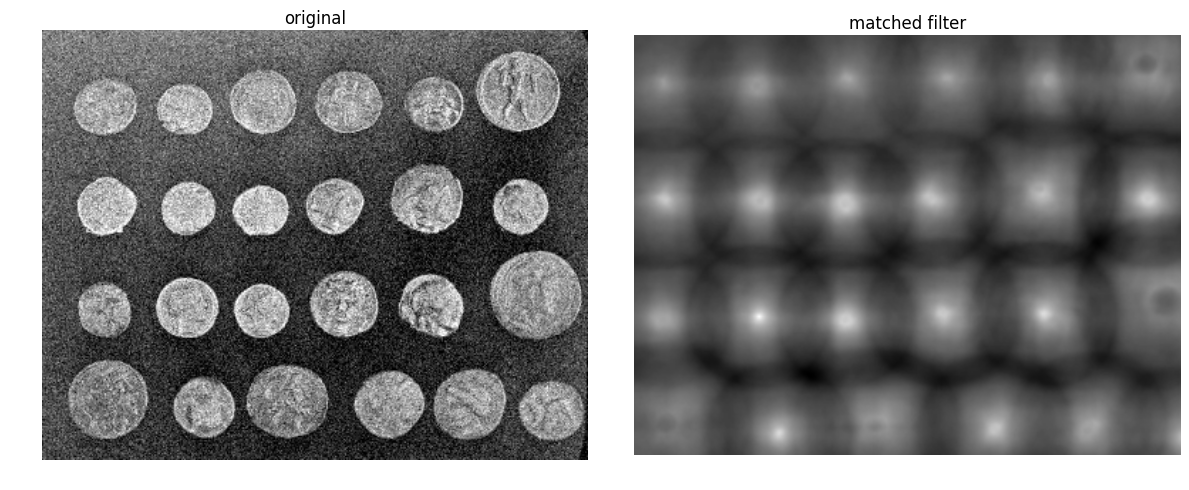

correlation coefficient = 47959.5607308
x=75 y=170


In [2]:
from skimage import transform, feature, filters, util, exposure, data, img_as_float, measure
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal
import math
import scipy.ndimage as ndi


image = data.coins()
matchedFilter = np.copy(image[170:220, 75:130])
matchedFilter = matchedFilter - matchedFilter.mean()
## add lil bit of noise
image = util.random_noise(image, var=0.01, mean=0)

#normalize
image = image - image.mean()

result = scipy.signal.correlate2d(image, matchedFilter, mode="valid")
result = result / result.size

fig,axes = plt.subplots(1,2, figsize=(12,6))

titles = ["original", "matched filter"]
for ax, im, tit in zip(axes, [image,result], titles):
    ax.imshow(im, cmap=cm.gray)
    ax.set_axis_off()
    ax.set_title(tit)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print("correlation coefficient = " + str(np.max(result)))
print("x=" + str(x), "y=" + str(y))

fig.tight_layout()
plt.show()


### do the same with convolution
result = scipy.signal.fftconvolve(image, matchedFilter[::-1, ::-1], mode="valid")

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print("correlation coefficient = " + str(np.max(result)))
print("x=" + str(x), "y=" + str(y))

### Fractional Power Filter

In [3]:
image = data.coins()
image = image - image.mean()
template = np.copy(image[170:220, 75:130])
template = template - template.mean()
q = 1

def nextPow2(n):
    return 2**(np.ceil(np.log2(n)))

def fpf(shape, template, q):
    o = np.fft.rfftn(template, s=shape)
    o_mag = np.abs(o)
    o_phase = -np.angle(o)
    
    return ((o_mag**q) * np.exp(1j*o_phase) )
    
def applyFPF(image, template, q):
    spec = np.fft.rfftn(image, s=(nextPow2(image.shape)).astype(np.uint16) ) * fpf(nextPow2(image.shape), template, q)
    
    return np.fft.irfftn(spec)

result = applyFPF(image, template, q)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print("correlation coefficient = " + str(np.max(result)))
print("x=" + str(x), "y=" + str(y))

correlation coefficient = 12234570.1822
x=75 y=170


/usr/local/lib/python3.5/dist-packages/numpy/fft/fftpack.py:75: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  z = zeros(s, a.dtype.char)


### 14.1.3 Correlated, weakly stationary noise as background

Assume that the noise is weakly correlated with a known autocorrelation function $r_{hh}{\tau}$ ($h(x)$ is the noise). After some mathemagical tricks, the detection filter equals
\begin{align}
V(f) = \mathrm{const.} \frac{O^*(f)} {S_{hh}(f)}.
\end{align}

In this case, $S_hh(f)$ is the power spectral density of the noise.

In [4]:
im = data.coins()


## generate colored noise

## TODO


Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

## Detection of unknown objects (defects)


### 14.3.1 Radon Transform

The Radon transform of a signal $g(x)$ is defined as
\begin{align}
\breve g(u,\phi) = \mathcal{R} \left\{ g(x) \right\} 
= \int \limits_{-\infty}^{\infty} \int \limits_{-\infty}^{\infty} 
g(x) \delta(x^{\mathrm{T}}e_{\phi} - u) 
\mathrm{d}x
\end{align}

with
\begin{align}
\phi \in [0 \pi), ~~ u \in \mathbb{R}, e_\phi =
\begin{bmatrix}{ 
cos(\phi)\\
sin(\phi)}
\end{bmatrix}
\end{align}

The $\delta$-line represents the transformation kernel and results in the summation of the values of the signal $g(x)$ along lines that have:
1. distance $u$ to the origin (lower left corner) in pixels
2. line angle $\phi$.

You can also say: *the radon transform contains all prallel projections of the signal $g(x)$ in an ordered manner*. Line-shaped structures will produce a distinct maximum if the image background is **zero-mean**.
1. either subtract average 
2. or use first-oder homogenization (high-pass filtering)

/usr/local/lib/python3.5/dist-packages/skimage/transform/radon_transform.py:66: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


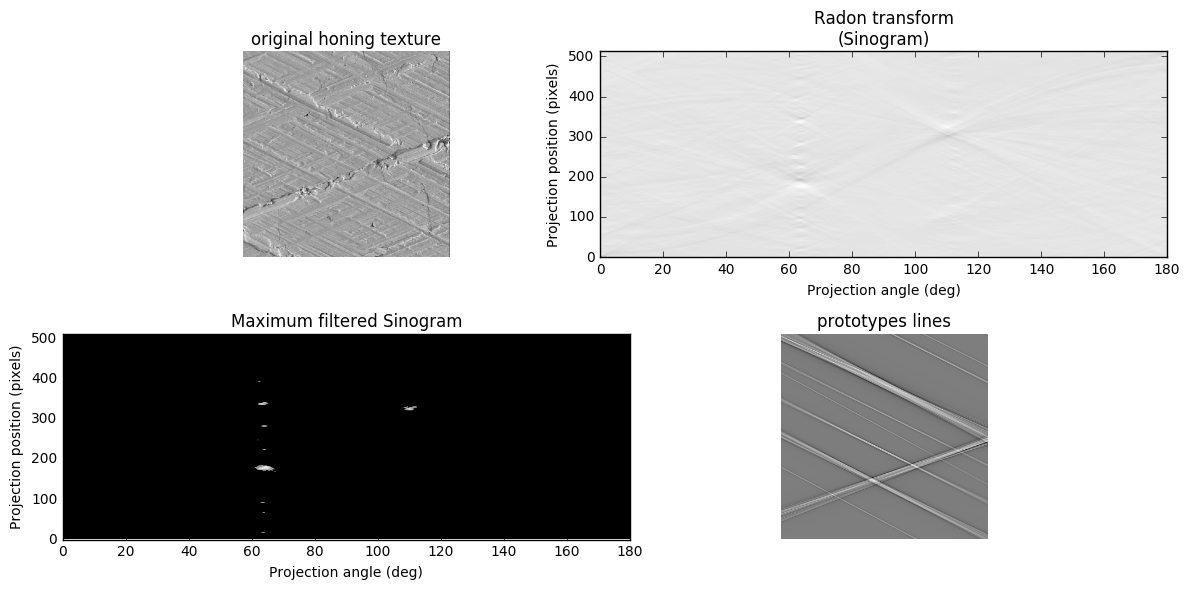

37.1236366846
-317.635102627


In [4]:
from skimage import img_as_ubyte, color
#image = img_as_ubyte( io.imread("../textures/1.3.12.tiff", plugin="freeimage") )
image = img_as_float( color.rgb2gray( io.imread("../textures/honing.jpg")) )
image = transform.resize(image, (512,512))
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = transform.radon(image - image.mean(), theta=theta, circle=True)

sinogram_filtered = sinogram.copy()
sinogram_filtered[sinogram<0.5*np.max(sinogram)] = 0
prototype = transform.iradon(sinogram_filtered, theta=theta, circle=False)

fig, axes = plt.subplots(2,2, figsize=(12,6))
titles = ["original", "Radon transform\n(Sinogram)", "only >0.5*np.max(sinogram)", "iradon(filteredSinogram)"]
images = [image, sinogram, sinogram_filtered, prototype]
axes = axes.ravel()

def plotRadon(sinograms, axes, extent):
    for sin, ax in zip(sinograms, axes):
        ax.imshow(sin, cm.gray, extent=extent, aspect='auto')
        ax.set_xlabel("Projection angle (deg)")
        ax.set_ylabel("Projection position (pixels)")
    return axes

def plotImages(images, axes):
    for im, ax in zip(images, axes):
        ax.imshow(im, cm.gray)
        ax.set_axis_off()
    return axes

ax_1, ax_4 = plotImages([image, prototype], [axes[0], axes[3]])
ax_1.set_title("original honing texture")
ax_4.set_title("prototypes lines")

ax_2, ax_3 = plotRadon([sinogram, sinogram_filtered], [axes[1], axes[2]], extent=(0, 180, 0, sinogram.shape[0]))
ax_2.set_title("Radon transform\n(Sinogram)")
ax_3.set_title("Maximum filtered Sinogram")

fig.tight_layout()
plt.show()
print(np.max(sinogram))
print(np.min(sinogram))

### Example 14.6 - Amplification of Line structures

Image from: http://www.ifm.zmaw.de/fileadmin/files/ers-sar/Sdata/oceanic/shipwakes/southchinasea/051253483ERS2.jpeg

The Radon-transform can be used to enhance line-shaped structures in low SNR images. This can be used in SAR images (synthetic aperture radar).

1. The image signal $\breve g(x)$ is high-pass filtered, thus resulting in an image with zero-mean.
2. The Radon-transform of the image is calculated. 
    3. in `skimage` the function `transform.radon(image, thete=,circle=False)` is called with `circle=False` arguemnt. This is necessary because the image is square and not circular.
3. A pointwise transform is applied to the sinogram: 
\begin{align}
    \mathcal{R} \left\{ \mathrm{HP} \left\{ g(x) \right\} \right\} &= k \\
    \mathrm{transform} \left\{ k \right\} &= \mathrm{sign} \left\{ k \right\} |k|^p \\
    \text{with $p>1$}
\end{align}
4. Afterwards, the inverse Radon transform is taken.

In this case, the $p=2$. Clearly, the line structures have been amplified. The benefit of the Radon-transform in contrast to other edge and line operators is the *integral* character. Being an integral transform, the Radon-transform is beneficial for images with low SNR (that means very noisy).

6.01009170453
-6.10528884411


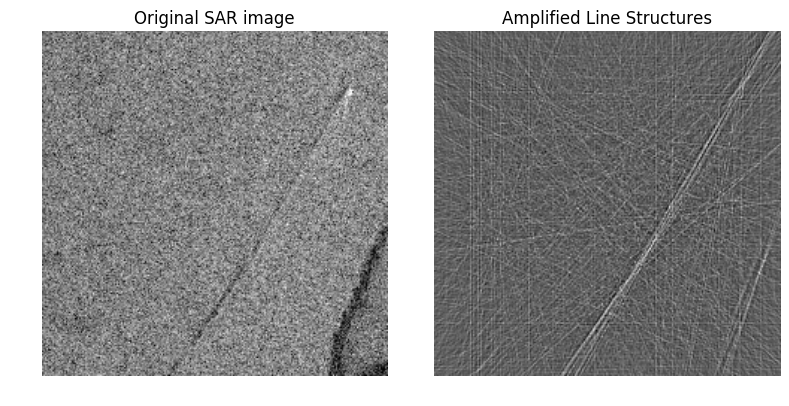

In [6]:
from skimage import img_as_ubyte, color
#image = img_as_ubyte( io.imread("../textures/1.3.12.tiff", plugin="freeimage") )
image = img_as_float( color.rgb2gray( io.imread("SARboat.jpeg")) )
N = np.min(image.shape) - 1
image = image[0:N, 0:N]
image = transform.rescale(image, 0.3)

def binomialSeries(L):
    out = np.zeros(L)
    for m in range(0,L):
        out[m] = math.factorial(L-1)/(math.factorial(m) * math.factorial(L-m-1))
    return out

LPkernel = binomialSeries(11)
LPkernel /= np.sum(LPkernel)
p = 3

imageHP = image - scipy.signal.sepfir2d(image, LPkernel, LPkernel)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = transform.radon(imageHP, theta=theta, circle=False)
print(np.max(sinogram))
print(np.min(sinogram))

enhancedSinogram = np.sign(sinogram)*(sinogram**p)
enhancedImage = transform.iradon(enhancedSinogram, theta=theta, circle=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
ax1.set_axis_off()
ax1.set_title("Original SAR image")
ax1.imshow(image, cmap=cm.gray)

ax2.set_title("Amplified Line Structures")
ax2.set_axis_off()
ax2.imshow(enhancedImage, cm.gray)

fig.tight_layout()
plt.show()

### 14.3.2.2 Detection using corelation filters

For detection line-shaped signales using correlation filters, the radon transform can be used for efficient correlation.

The convolution of an image $g(x)$ with a line-shaped tempalte $l(x^\mathrm{T} e_\phi - u)$ corresponds to a convolution of the sinogram $\breve g(u,\phi)$ with the *line profile* of the image.
\begin{align}
    g(x) \overbrace{*}^u l(x^\mathrm{T}e_\phi)  = \breve g(u,\phi) \overbrace{*}^u l(u)
\end{align}

If the convolution is then carried out in the freuency domain ($f_u, f_\phi$), the convolution can be carried out much more efficiently.

### 14.3.3 The Hough transform

The Hough transform is a line detection transformation for bi'nary images.

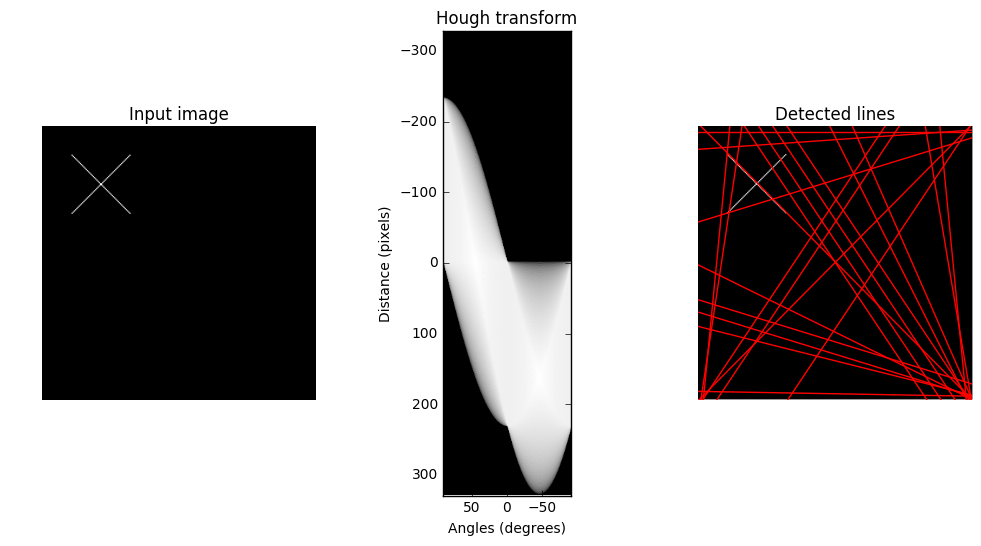

In [13]:
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255


h, theta, d = transform.hough_line(image)




fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

ax2.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)
ax2.set_title('Hough transform')
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.axis('image')

ax3.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, cols), (y0, y1), '-r')
ax3.axis((0, cols, rows, 0))
ax3.set_title('Detected lines')
ax3.set_axis_off()

plt.show()

### 14.3.4 Hough transform for detection circles

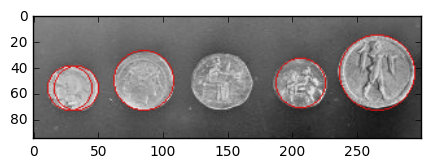

In [22]:
# Load picture and detect edges
image = img_as_ubyte(data.coins()[0:95, 70:370])
edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 2))

# Detect two radii
hough_radii = np.arange(15, 30, 2)
hough_res = transform.hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 2
    peaks = feature.peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:5]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = draw.circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

### 14.3.6 Implicit shape Models

### 14.4 Corner detection

Detecting corners is important for various scenarios:
1. depth from correspondance algorithms
2. object recognition and camera calibration
3. localization of corners

An Edge shows a high change of the image value in the gradient direction, i.e., perpendicular to the edge, whereas the image value changes barely *along* the edge.
A **corner** shows high change of image values in **all** directions.
1. @intersections of two lines
2. @isolated points which are brighter or darker than their surrdoundings.

Various edge operators exist: (https://en.wikipedia.org/wiki/Corner_detection)
1. Harris
2. Shi and Tomasi
3. Level curve curvature
4. Hessian feature strength measures
5. SUSAN
6. FAST
7. etc.... 

### 14.4.1 Harris Operator

the Harris Operator considers a local window of the image and compares it to a slightly shifted window of the image.
1. an edge causes a notable change of the image values for a shift in the direction of the gradient, but no change in the direction of the edge
2. a corner causes notable changes of the image values for a shift in all directions

As the window function, a Gaussian function with the paramters $\sigma$ is chosen.

After some maths (and a taylor approximation of first order), the *structure tensor* **$J_\sigma(\mathrm{grad} g(x)) = C(x,y)$** is optained.

The matrix $C(x,y)$ is further characterized by its eigenvalues and eigenvectors $\mu_1,\mu_2$, $v_1,v_2$. Without loss of generality, the eigenvalues are ordered high to low.
1. for small eigenvalues, the change of image values $c(x)$ is low in every shift direction ==> homogeneous image region.
2. $\mu_1$ is large, $\mu_2$ is small. Therefore, the change $c(x)$ is large in direction $v_1$ and small in the orthogonal direction $v_2$ ==> edge
3. both eigenvalues are large. ==> corner

**BUT** the calculation of eigenvalues is to complex, therefore the determinant and trace of $C(x,y)$ are calculated.
\begin{align}
\mathrm{det}(C) &= \mu_1 \mu_2 \\
\mathrm{trace}(C) &= \mu_1 + \mu_2 = \sum {\mathrm{diag}}
\end{align}

The determinant is especially large for corners while the trace is large for *corners and edges*. The Harris operator is defined as:
\begin{align}
corner(x) =  \mathrm{det} C(x)- k(\mathrm{trace}(C(x)))^2, ~~k>0
\end{align}

$corner(x)$ is:
1. very large for corners
2. negative for edges
3. around zero for homogenious regions.

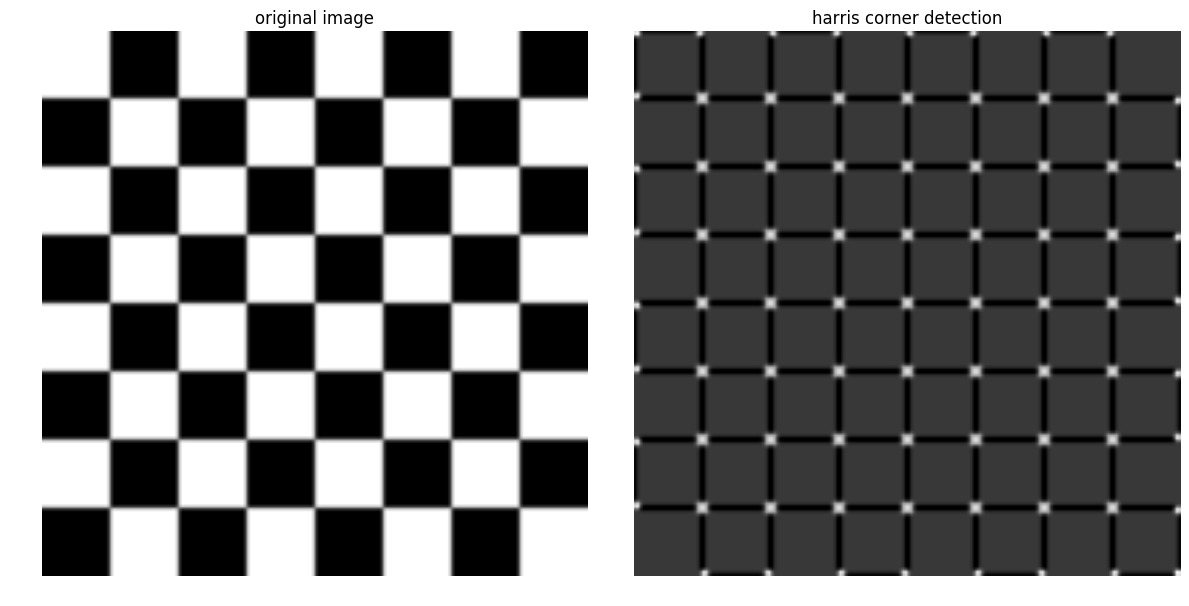

In [31]:
image = color.rgb2gray(data.checkerboard())

harris = feature.corner_harris(image)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))


ax1.imshow(image, cmap=cm.gray)
ax1.set_axis_off()
ax1.set_title("original image")

ax2.imshow(harris, cmap=cm.gray)
ax2.set_axis_off()
ax2.set_title("harris corner detection")

fig.tight_layout()
plt.show()

this concludes the content of Ch. 14.

## Additional content